<a href="https://colab.research.google.com/github/shubhamk2001/Customer-Churn/blob/main/Customer_Churn(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px

In [94]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [96]:
customer = pd.read_csv("customer_churn.csv")

In [97]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Manipulation

In [98]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [99]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [100]:
customer.duplicated().sum()

0

In [101]:
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], downcast = 'integer', errors = 'coerce')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
sum(customer['gender']=="Male")

3555

In [103]:
sum(customer['InternetService']=="DSL")

2421

In [104]:
new_customer=customer[(customer['gender']=='Female') &
(customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


In [105]:
new_customer=customer[(customer['tenure'] <10) | (customer['TotalCharges']<500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


# Data Visualization

In [106]:
names = customer["Churn"].value_counts().keys().tolist()
sizes=  customer["Churn"].value_counts().tolist()

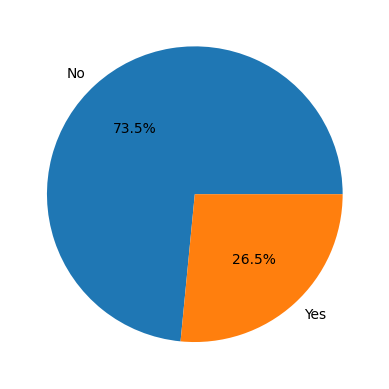

In [107]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

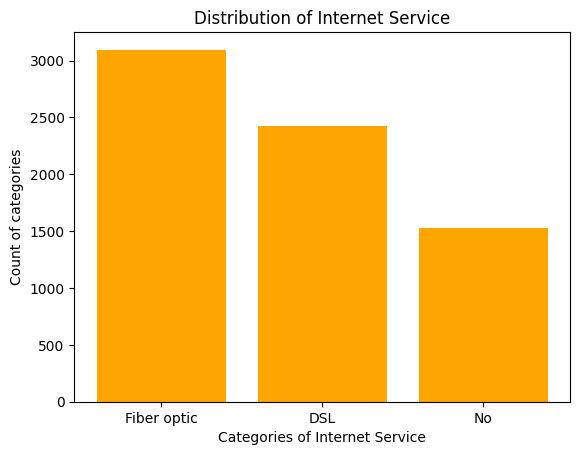

In [108]:
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

# Model Building

## Model 1

In [109]:
x=customer[['tenure']]
y=customer[['Churn']]

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [111]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
# Instead of directly converting to int, use LabelEncoder to convert 'Yes'/'No' to 1/0
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train['Churn'] = le.fit_transform(y_train['Churn'])
y_test['Churn'] = le.transform(y_test['Churn'])

# Now you can safely convert to numeric types
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [115]:
model.fit(x_train, y_train, epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7173 - loss: 0.6073 - val_accuracy: 0.7283 - val_loss: 0.5273
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7339 - loss: 0.5237 - val_accuracy: 0.7283 - val_loss: 0.5162
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 0.5191 - val_accuracy: 0.7269 - val_loss: 0.5109
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7369 - loss: 0.5068 - val_accuracy: 0.7283 - val_loss: 0.5110
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7413 - loss: 0.5104 - val_accuracy: 0.7511 - val_loss: 0.5092
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7469 - loss: 0.5092 - val_accuracy: 0.7283 - val_loss: 0.5128
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7384 - loss: 0.5187 - val_accuracy: 0.7283 - val_loss: 0.5109
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 0.5076 - val_accu

In [116]:
training_history = model.history.history

In [117]:
np.mean(training_history['val_accuracy'])

0.7478561282157898

In [118]:
print(training_history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [119]:
y_pred=model.predict(x_test)
y_pred

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.57382727],
       [0.21760827],
       [0.16643476],
       ...,
       [0.11475032],
       [0.23493889],
       [0.22558124]], dtype=float32)

In [120]:
from sklearn.metrics import confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

[[1539    0]
 [ 574    0]]


In [121]:
np.mean(training_history['accuracy'])

0.7528864139318466

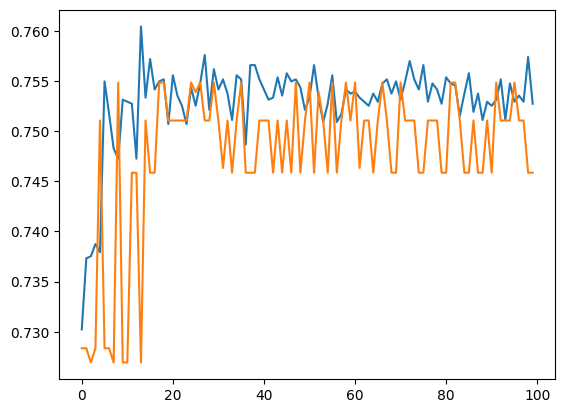

In [122]:
from matplotlib import pyplot as plt
plt.plot(training_history['accuracy'])
plt.plot(training_history['val_accuracy'])
plt.show()

## Model 2

In [123]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100,validation_data=(x_test,y_test))
training_history2 = model.history.history


Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6140 - loss: 0.6660 - val_accuracy: 0.7283 - val_loss: 0.5284
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7419 - loss: 0.5428 - val_accuracy: 0.7283 - val_loss: 0.5189
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7375 - loss: 0.5385 - val_accuracy: 0.7283 - val_loss: 0.5178
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7465 - loss: 0.5199 - val_accuracy: 0.7283 - val_loss: 0.5161
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7417 - loss: 0.5246 - val_accuracy: 0.7283 - val_loss: 0.5153
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.5295 - val_accuracy: 0.7283 - val_loss: 0.5153
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7386 - loss: 0.5336 - val_accuracy: 0.7283 - val_loss: 0.5135
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7372 - loss: 0.5268 - val_accu

In [125]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1539    0]
 [ 574    0]]


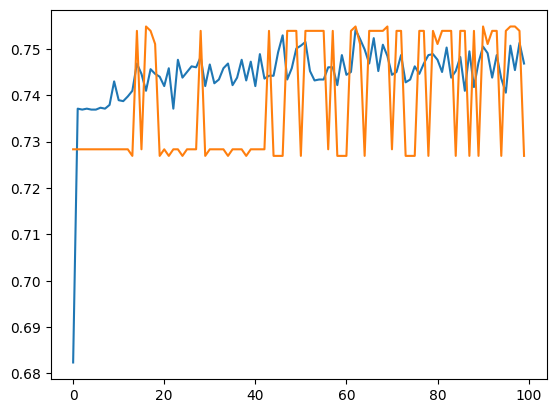

In [126]:
from matplotlib import pyplot as plt
plt.plot(training_history2['accuracy'])
plt.plot(training_history2['val_accuracy'])
plt.show()

In [127]:
np.mean(training_history2['val_accuracy'])

0.738939893245697

## Model 3

In [128]:
x=customer[['MonthlyCharges','tenure','TotalCharges']]#Features
y=customer[['Churn']]#Target

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [130]:
# Apply Label Encoding to 'Churn' in y_train and y_test
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train['Churn'] = le.fit_transform(y_train['Churn'])
y_test['Churn'] = le.transform(y_test['Churn'])

In [131]:
print(np.isnan(x_train).any(), np.isnan(y_train).any())
print(np.isinf(x_train).any(), np.isinf(y_train).any())
print(np.isnan(x_test).any(), np.isnan(y_test).any())
print(np.isinf(x_test).any(), np.isinf(y_test).any())

MonthlyCharges    False
tenure            False
TotalCharges       True
dtype: bool Churn    False
dtype: bool
MonthlyCharges    False
tenure            False
TotalCharges      False
dtype: bool Churn    False
dtype: bool
MonthlyCharges    False
tenure            False
TotalCharges       True
dtype: bool Churn    False
dtype: bool
MonthlyCharges    False
tenure            False
TotalCharges      False
dtype: bool Churn    False
dtype: bool


In [133]:
# Calculate column-wise means, ignoring NaN values
col_means = x_train.mean() # Use pandas mean to handle NaN values directly

# Replace NaN values with the corresponding column means using fillna
x_train = x_train.fillna(col_means)

In [135]:
# Calculate column-wise means, ignoring NaN values
col_means = x_test.mean() # Use pandas mean to handle NaN values directly

# Replace NaN values with the corresponding column means using fillna
x_test = x_test.fillna(col_means)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [137]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100,validation_data=(x_test,y_test))
training_history3 = model.history.history


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7402 - loss: 0.5981 - val_accuracy: 0.7870 - val_loss: 0.4782
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7769 - loss: 0.4821 - val_accuracy: 0.7795 - val_loss: 0.4562
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7877 - loss: 0.4473 - val_accuracy: 0.7866 - val_loss: 0.4518
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7754 - loss: 0.4680 - val_accuracy: 0.7851 - val_loss: 0.4479
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7848 - loss: 0.4617 - val_accuracy: 0.7837 - val_loss: 0.4452
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.4399 - val_accuracy: 0.7823 - val_loss: 0.4452
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7811 - loss: 0.4532 - val_accuracy: 0.7847 - val_loss: 0.4436
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7838 - loss: 0.4624 - val_accuracy: 0.7885

In [138]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1539    0]
 [ 574    0]]


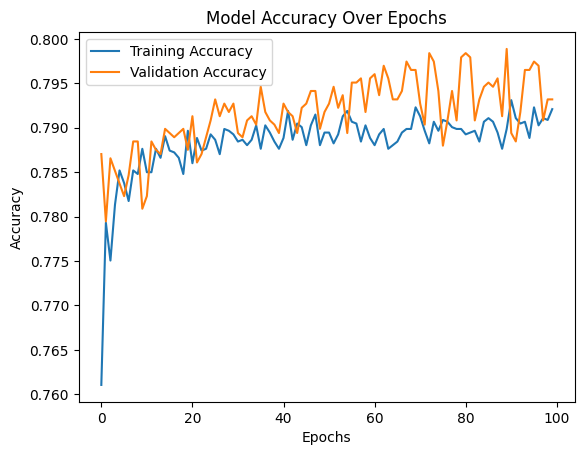

In [139]:
# Plot training and validation accuracy
plt.plot(training_history3['accuracy'], label='Training Accuracy')
plt.plot(training_history3['val_accuracy'], label='Validation Accuracy')

# Add title and labels
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [140]:
np.mean(training_history3['val_accuracy'])

0.7916848182678222